In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UML/HW6/flicker_data/Flickr_sampled_edges/community_membership_2K.csv', header=None)
data.columns = ['v1' , 'v2']

In [ ]:
data.head()

,v1,v2
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


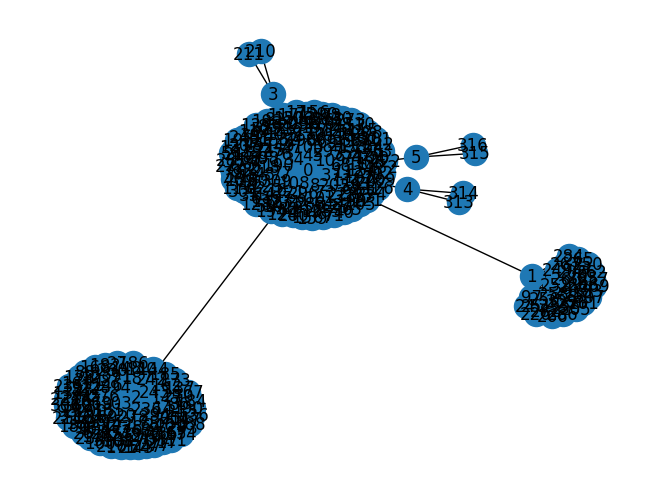

In [ ]:
# create graph object
g = nx.Graph()
for i, row in data.iterrows():
    g.add_edge(row[0], row[1])

# plot the graph
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True)
plt.show()

In [ ]:
g.remove_edges_from([(u, v) for u, v in g.edges() if u == v])

In [ ]:
ebc = {edge: 0 for edge in g.edges()}

# for src in data['v2'].unique():
src = 0
    # print(src)

sp_lengths = nx.single_source_shortest_path_length(g, source=src)

sorted_spl = sorted(sp_lengths, key=sp_lengths.get, reverse=True)
sorted_spl.pop()

num_sp = dict()

for target in data['v1'].unique():
        if target != src:
            num_sp[target] = len([p for p in nx.all_shortest_paths(g, source=src, target=target)])

num_sp = {k: num_sp[k] for k in sorted_spl}

print(num_sp)

for v2 in num_sp.keys():
        v1 = list(g.neighbors(v2))[0]
        score = 0

        while v1 != src:
            for k in ebc.keys():
                if k == (v1,v2):
                    if num_sp[v2] != 0:
                        score = num_sp[v1] / num_sp[v2]
                    else:
                        score = 0
                    ebc[k] += score
            v2 = v1
            v1 = list(g.neighbors(v2))[0]
            i += 1

        ebc[tuple(sorted((v1,v2)))] += 1

print(ebc)
print('----------------')

{23: 1, 24: 1, 97: 1, 205: 1, 206: 1, 226: 1, 233: 1, 249: 1, 250: 1, 251: 1, 252: 1, 253: 1, 254: 1, 255: 1, 256: 1, 257: 1, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 1, 267: 1, 268: 1, 269: 1, 282: 1, 283: 1, 284: 1, 286: 1, 291: 1, 307: 1, 25: 1, 26: 1, 27: 1, 86: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 1, 147: 1, 148: 1, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 1, 166: 1, 167: 1, 168: 1, 169: 1, 170: 1, 171: 1, 172: 1, 173: 1, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 1, 189: 1, 200: 1, 201: 1, 212: 1, 213: 1, 214: 1, 216: 1, 217: 1, 219: 1, 220: 1, 227: 1, 228: 1, 229: 1, 230: 1, 234: 1, 235: 1, 236: 1, 237: 1, 238: 1, 239: 1, 241: 1, 242: 1, 243: 1, 244: 1, 246: 1, 247: 1, 248: 1, 270: 1, 276: 1, 277: 1, 278: 1, 279: 1, 293: 1, 294: 1, 295: 1, 303: 1,

In [ ]:
keep_edges = [k for i, (k, v) in enumerate(sorted(ebc.items(), key=lambda x: x[1], reverse=True)) if i >= 5]
g.remove_edges_from([edge for edge in g.edges() if edge not in keep_edges])

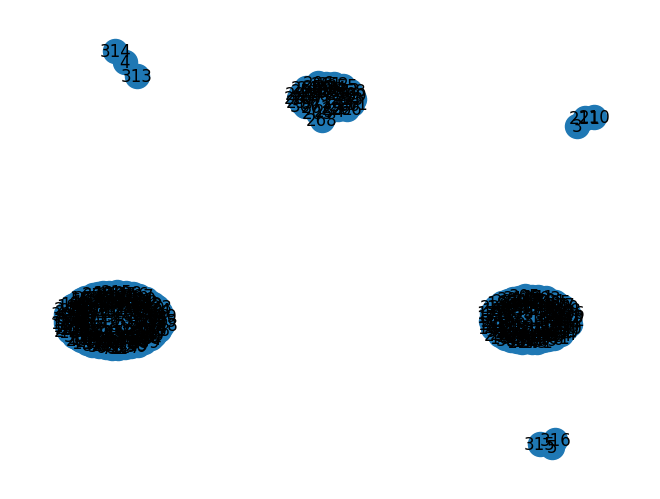

In [ ]:
# plot the graph
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True)
plt.show()